<a href="https://colab.research.google.com/github/Rohinkumar1841/LGMVIP-DataScience/blob/main/Task_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LGM-VIP Data Science Internship Programme
## Beginner Level Task-1


In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
import gc
import lightgbm as lgb
from xgboost import XGBClassifier

In [5]:
#Reading required files from their respective paths
# data_path = '/Data'
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')
song_extra_info = pd.read_csv('song_extra_info.csv')

Now , we are printing the shape and features of  each file , for a better understanding .

In [6]:
print('Shape of train file is : ', train.shape)
print('Shape of test file is : ', test.shape)
print('Shape of songs file is : ', songs.shape)
print('Shape of members file is : ', members.shape)
print('Shape of songs_extra_info file is : ', song_extra_info.shape)

Shape of train file is :  (634030, 6)
Shape of test file is :  (625973, 6)
Shape of songs file is :  (21099, 7)
Shape of members file is :  (34403, 7)
Shape of songs_extra_info file is :  (27245, 3)


In [7]:
print('Features of train : ', train.columns)
print('Features of test :', test.columns)
print('Features of songs : ', songs.columns)
print('Features of members : ', members.columns)
print('Features of songs_extra_info : ', song_extra_info.columns)

Features of train :  Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')
Features of test : Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type'],
      dtype='object')
Features of songs :  Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')
Features of members :  Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')
Features of songs_extra_info :  Index(['song_id', 'name', 'isrc'], dtype='object')


#**Analysis of data in Train.csv**

Here , We will basically analyze each and every feature from the files with respect to the target.


In [8]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634030 entries, 0 to 634029
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                634030 non-null  object 
 1   song_id             634029 non-null  object 
 2   source_system_tab   632228 non-null  object 
 3   source_screen_name  605187 non-null  object 
 4   source_type         632510 non-null  object 
 5   target              634029 non-null  float64
dtypes: float64(1), object(5)
memory usage: 29.0+ MB


In [9]:
def count_plot(data, x, hue, type):
  '''Function to plot histograms with respect to argument type (category/target)'''
  plt.figure(figsize=(18,15))
  sns.set(font_scale=2)
  sns.countplot(x=x, hue=hue, data=data)
  plt.xlabel(x,fontsize=30)
  plt.ylabel('count',fontsize=30)
  plt.xticks(rotation='90')
  plt.title('Count plot for {0} in {1} data'.format(x, type),fontsize=30)
  plt.tight_layout()

In [10]:
def count_plot_function(data, x):
  '''Function to plot histograms for categories'''
  plt.figure(figsize=(18,15))
  sns.set(font_scale=2)
  sns.countplot(x=x, data=data)
  plt.xlabel(x,fontsize=30)
  plt.ylabel('count',fontsize=30)
  plt.xticks(rotation='90')
  plt.title('Count plot',fontsize=30)
  plt.tight_layout()

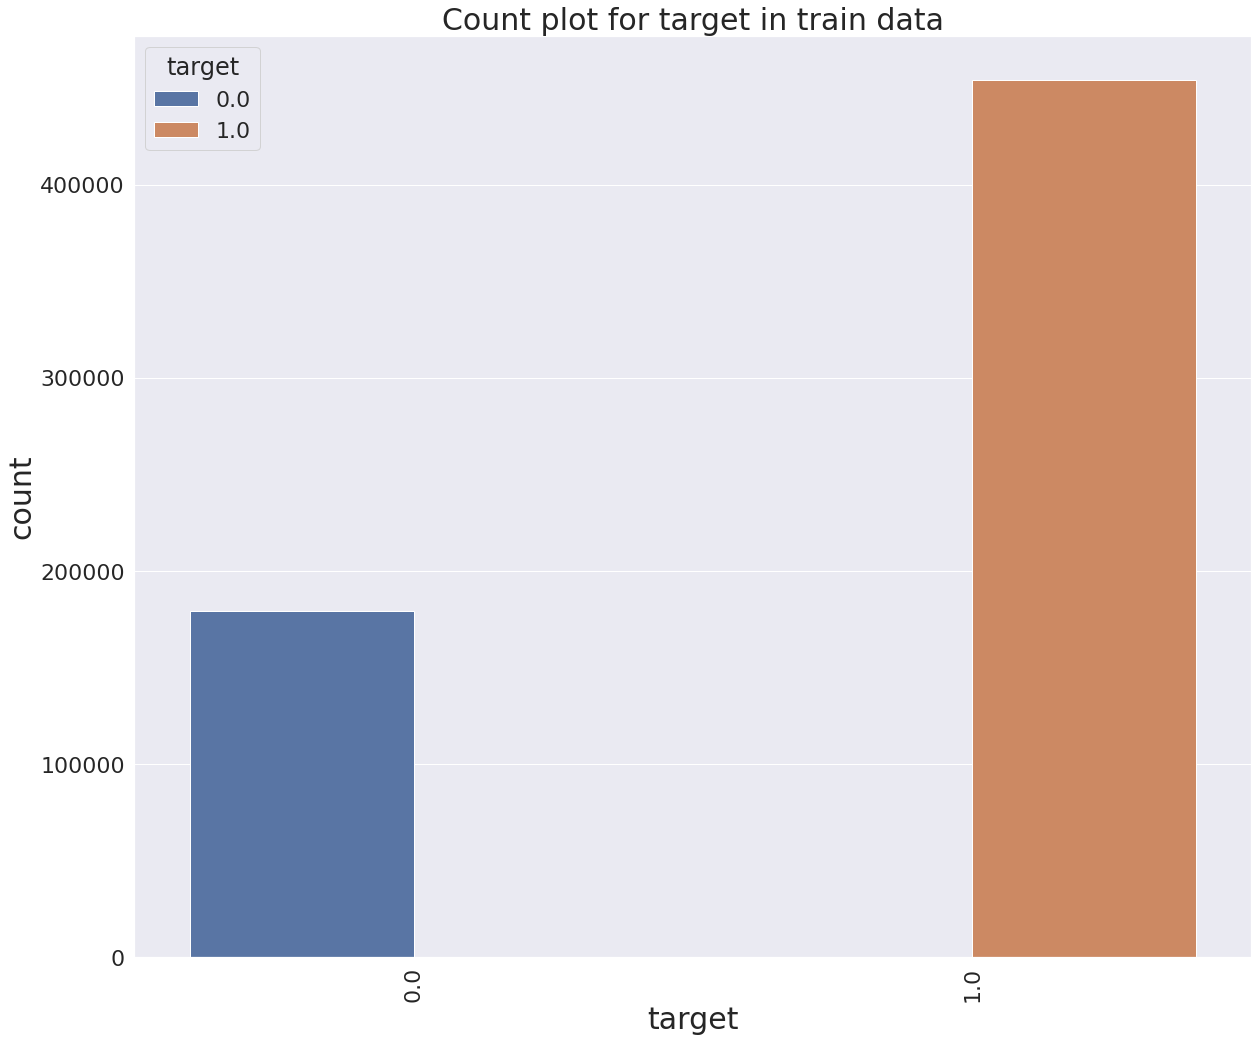

In [11]:
count_plot(train, 'target', 'target', 'train')

In [12]:
print('Data for label 1 : {:.4f}%'.format(train['target'].value_counts()[0]/train.shape[0] * 100))
print('Data for label 0 : {:.4f}%'.format(train['target'].value_counts()[1]/train.shape[0] * 100))

Data for label 1 : 28.3053%
Data for label 0 : 71.6946%



Label-1 data is around 29.9% and 

label-0 data is around 70.094%

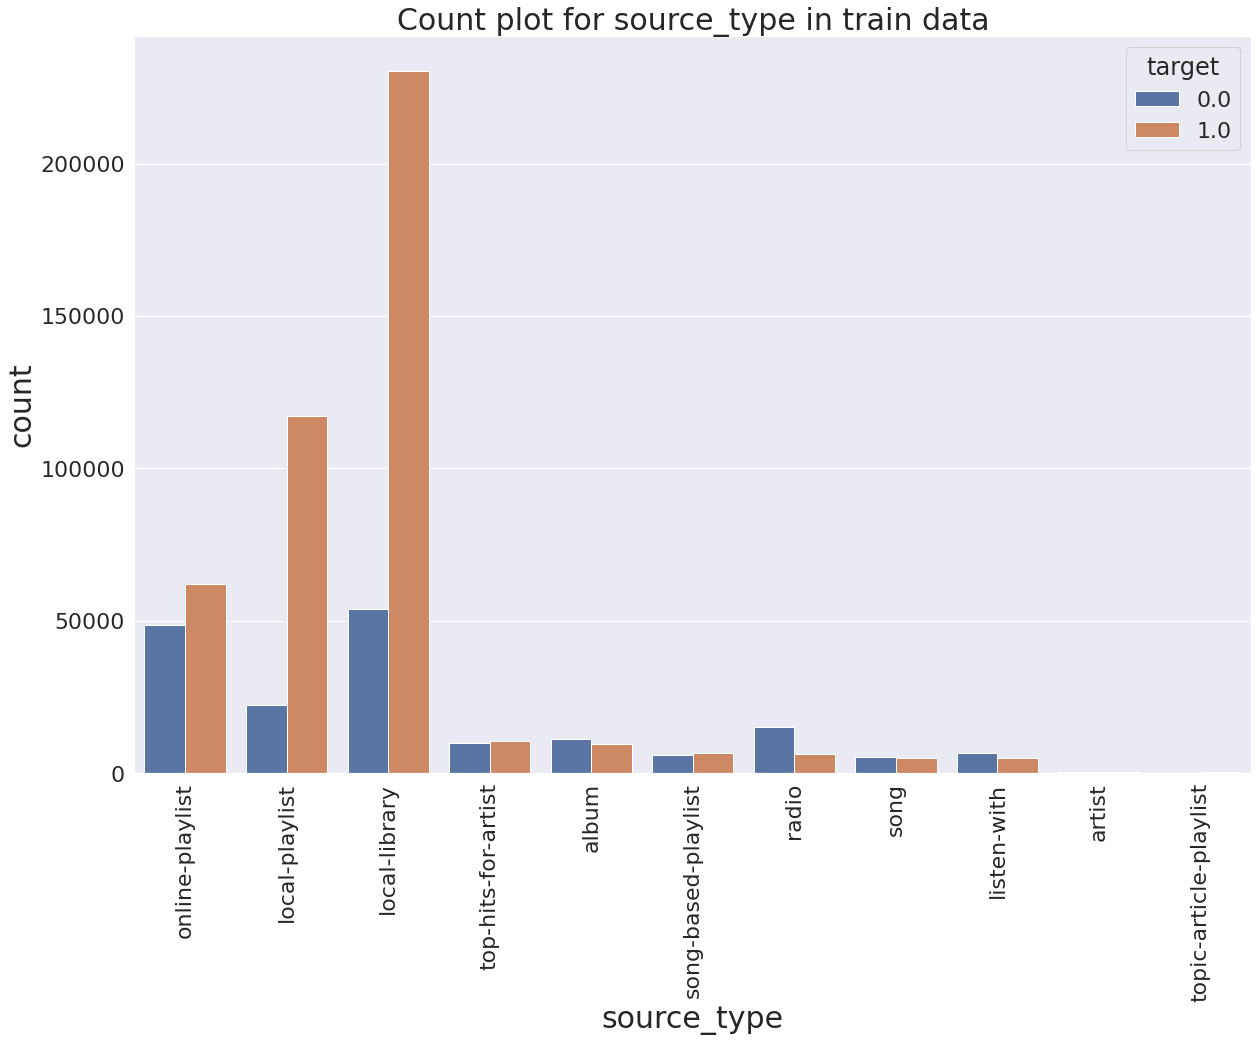

In [13]:
count_plot(train, 'source_type', 'target', 'train')

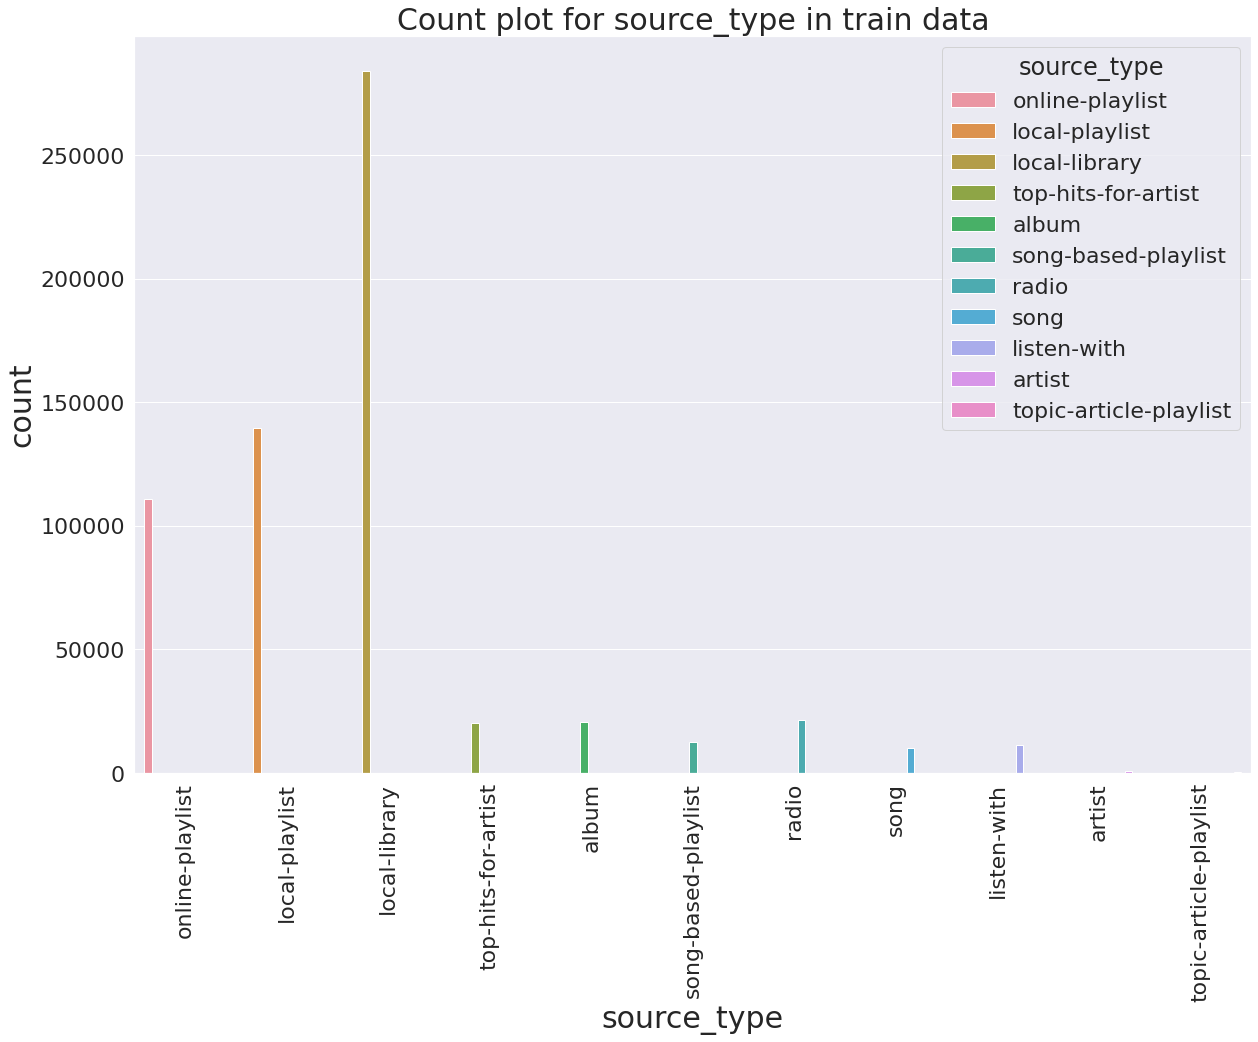

In [14]:
count_plot(train, 'source_type', 'source_type', 'train')

source_type basically describes the entry point i.e  a user first plays music on mobile apps.

From the above plot it is clear that, most of the users starts playing songs via their local-library, online-playlist or local-playlist.

People don't seem to start listening music with artist or daily-playlist.

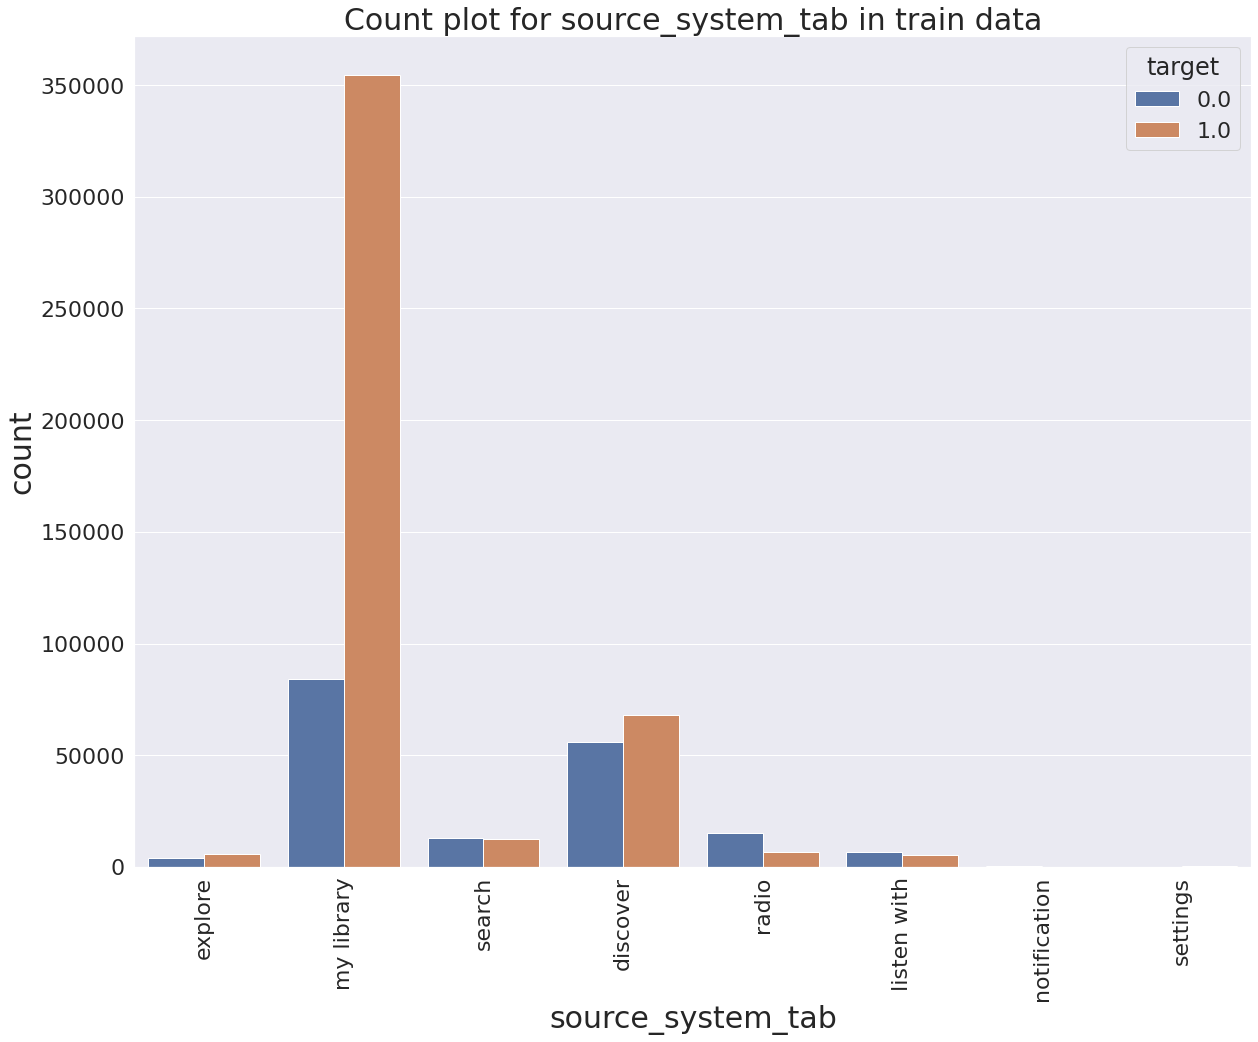

In [15]:
count_plot(train, 'source_system_tab', 'target', 'train')

source_system_tab describes the name of the tab where the event was triggered. 


The above plot makes it clear that people repeat songs from their library or discover tabs.

People are not interested to repeat songs from notifications or settings tab .

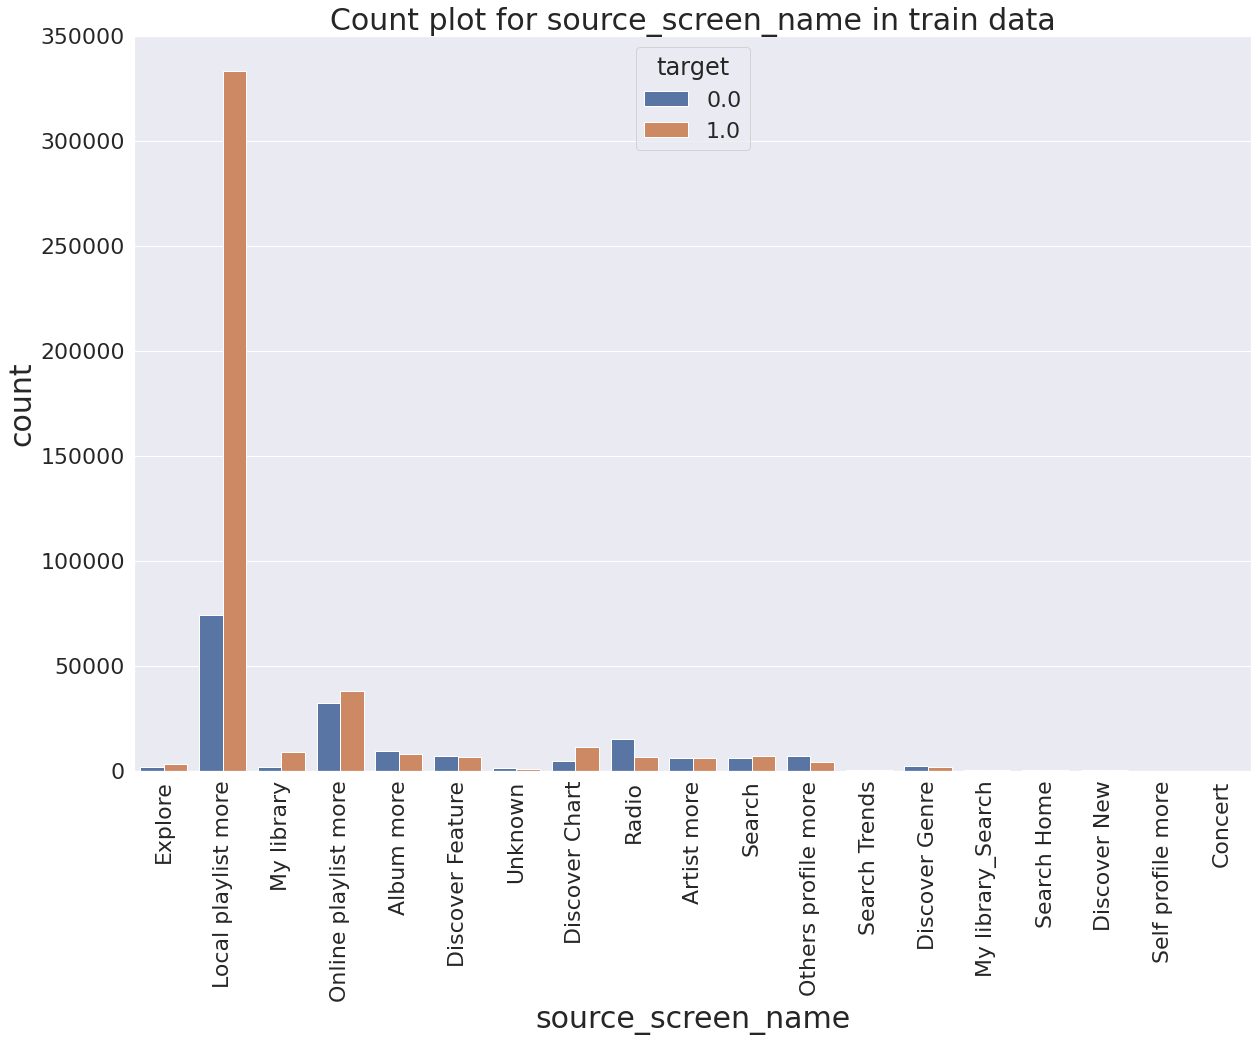

In [16]:
count_plot(train, 'source_screen_name', 'target', 'train')

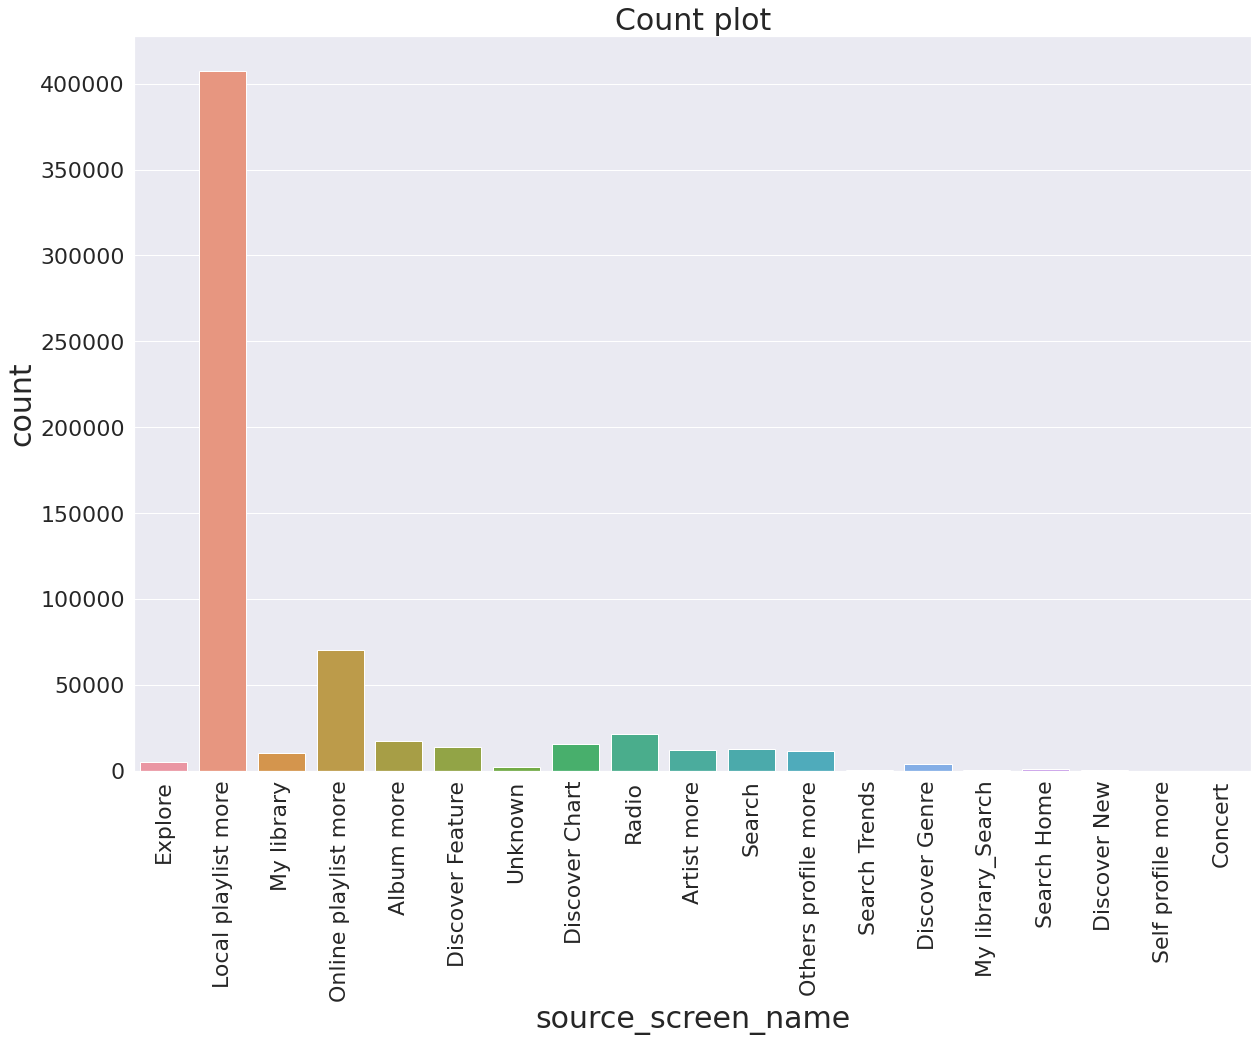

In [17]:
count_plot_function(train, 'source_screen_name')

source_screen_name is nothing but the  the name of the layout a user sees.

The above plot depicts that most of the users prefer local_playlist or online_playlist_more as their favourite layouts.

# **Analysis of data in Members.csv**

In [18]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [19]:
def count_plot_function(data, x):
  '''Function to plot histograms for categories'''
  plt.figure(figsize=(18,15))
  sns.set(font_scale=2)
  sns.countplot(x=x, data=data)
  plt.xlabel(x,fontsize=30)
  plt.ylabel('count',fontsize=30)
  plt.xticks(rotation='90')
  plt.title('Count plot',fontsize=30)
  plt.tight_layout()

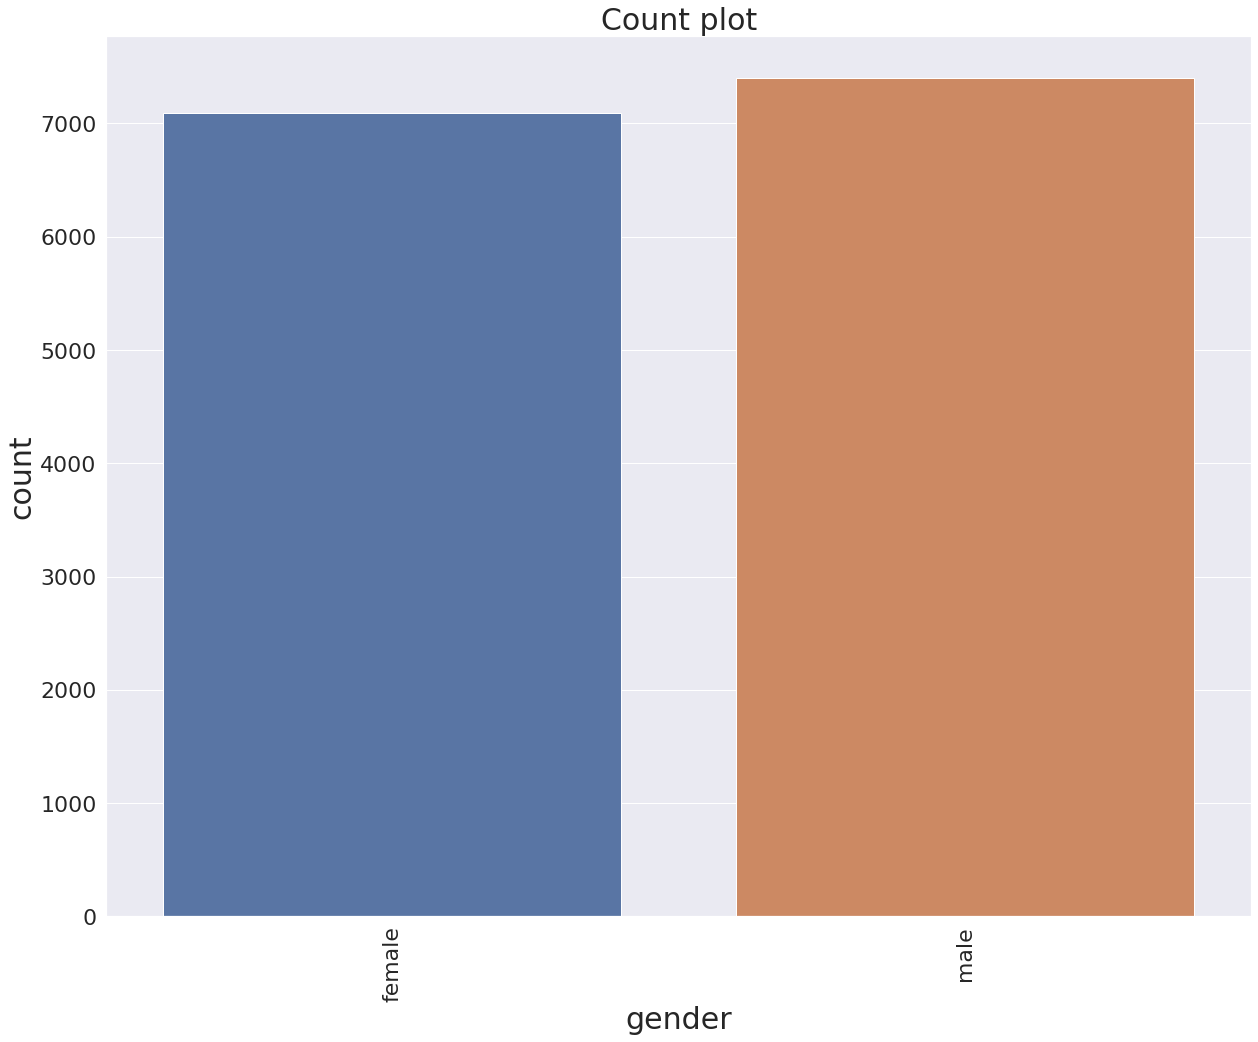

In [20]:
count_plot_function(members, 'gender')

Form the above plot , both male and female users prefer to listen songs equally.


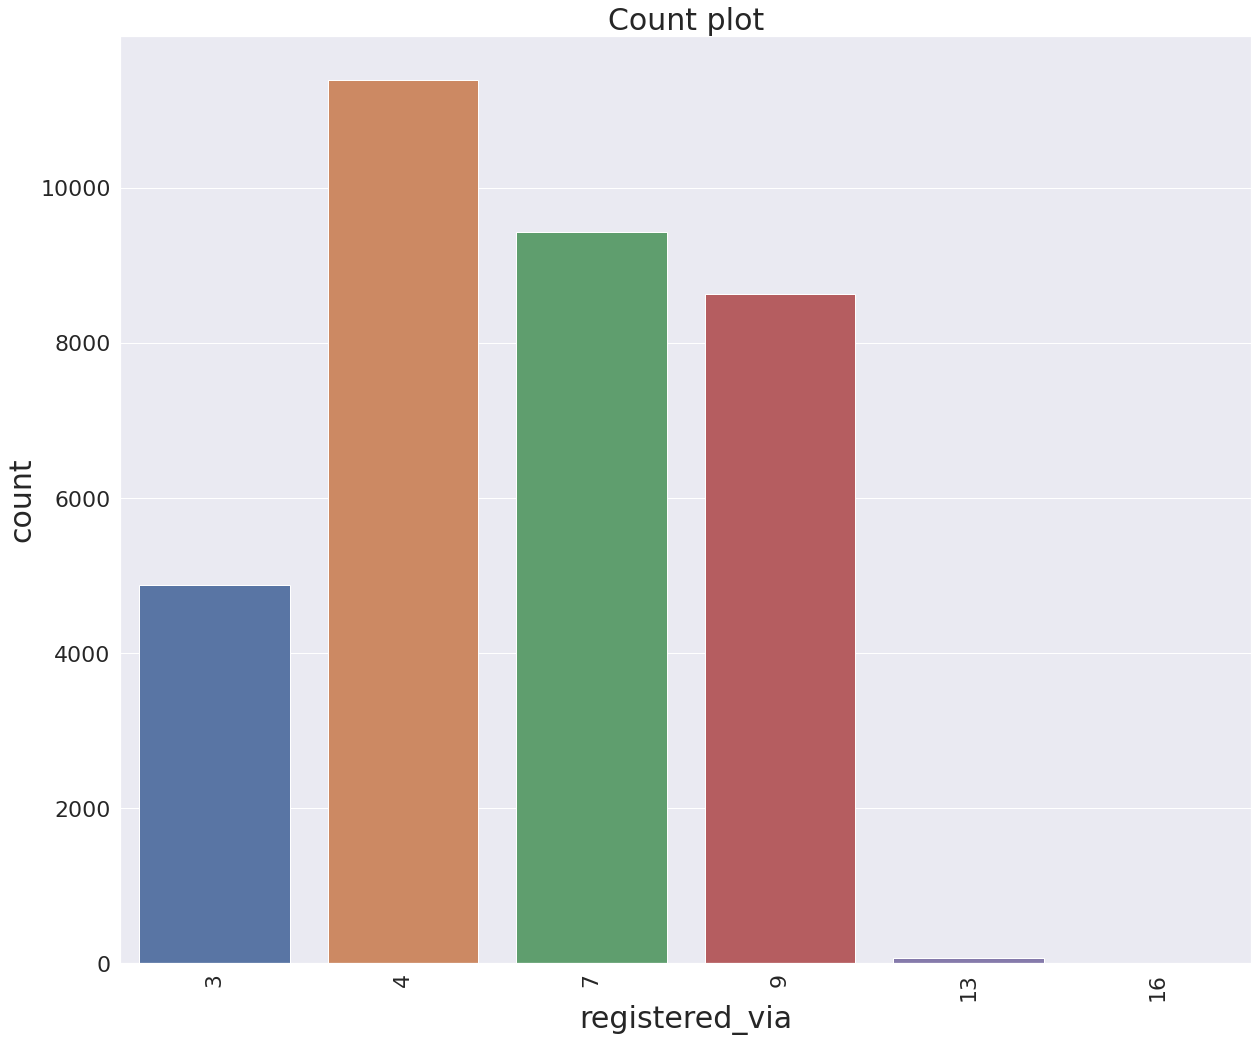

In [21]:
count_plot_function(members, 'registered_via')

Below is the data obtained from the above plot :

Most of the registrations happened via method '4', '7' and '9'.

Very Few uses have registered theirselves via '13' and '16' methods.

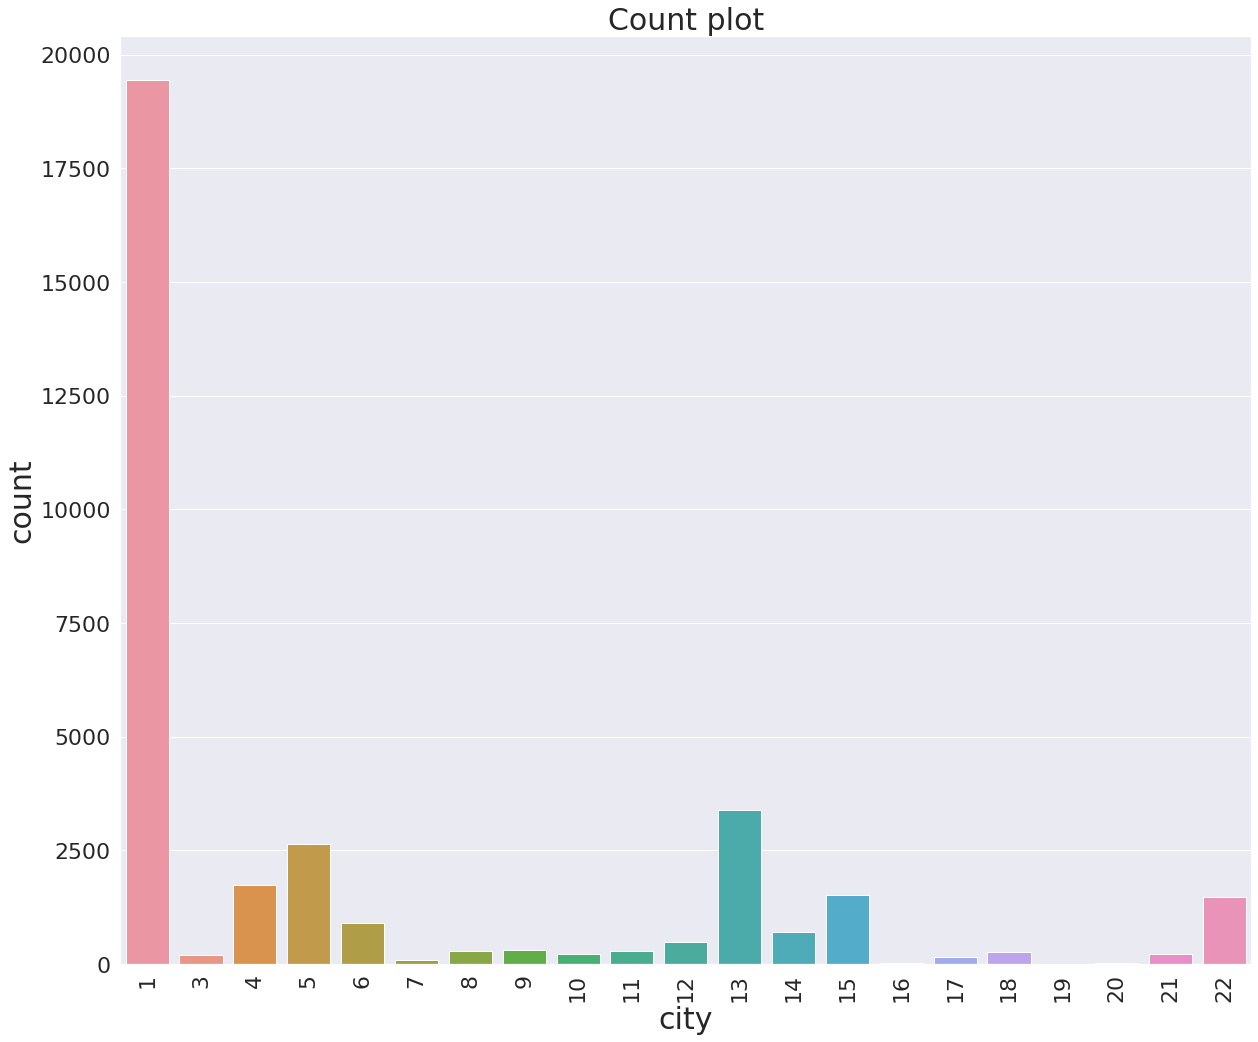

In [22]:
count_plot_function(members, 'city')

From the above plot , we can derive the following observations: 

Most of the people who used to listen songs are from '1'- labelled city.

Some cities have very few people who prefer listening music via this music app.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for registration')

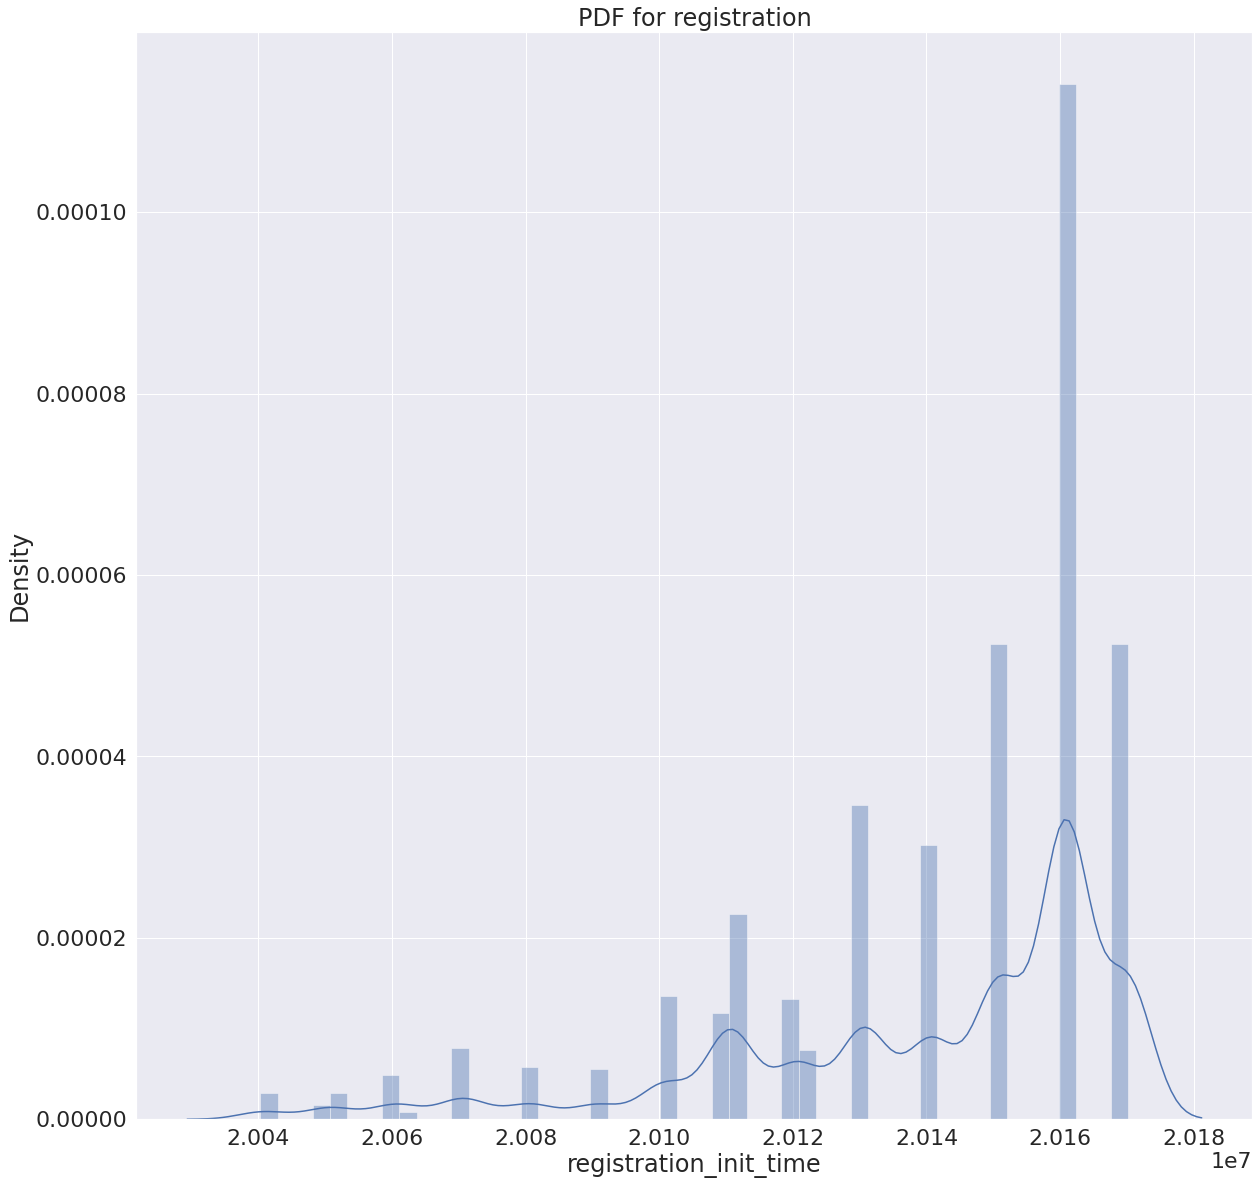

In [23]:
plt.figure(figsize = (20, 20)) 
sns.distplot(members.registration_init_time)
sns.set(font_scale=2)
plt.title('PDF for registration')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for registration')

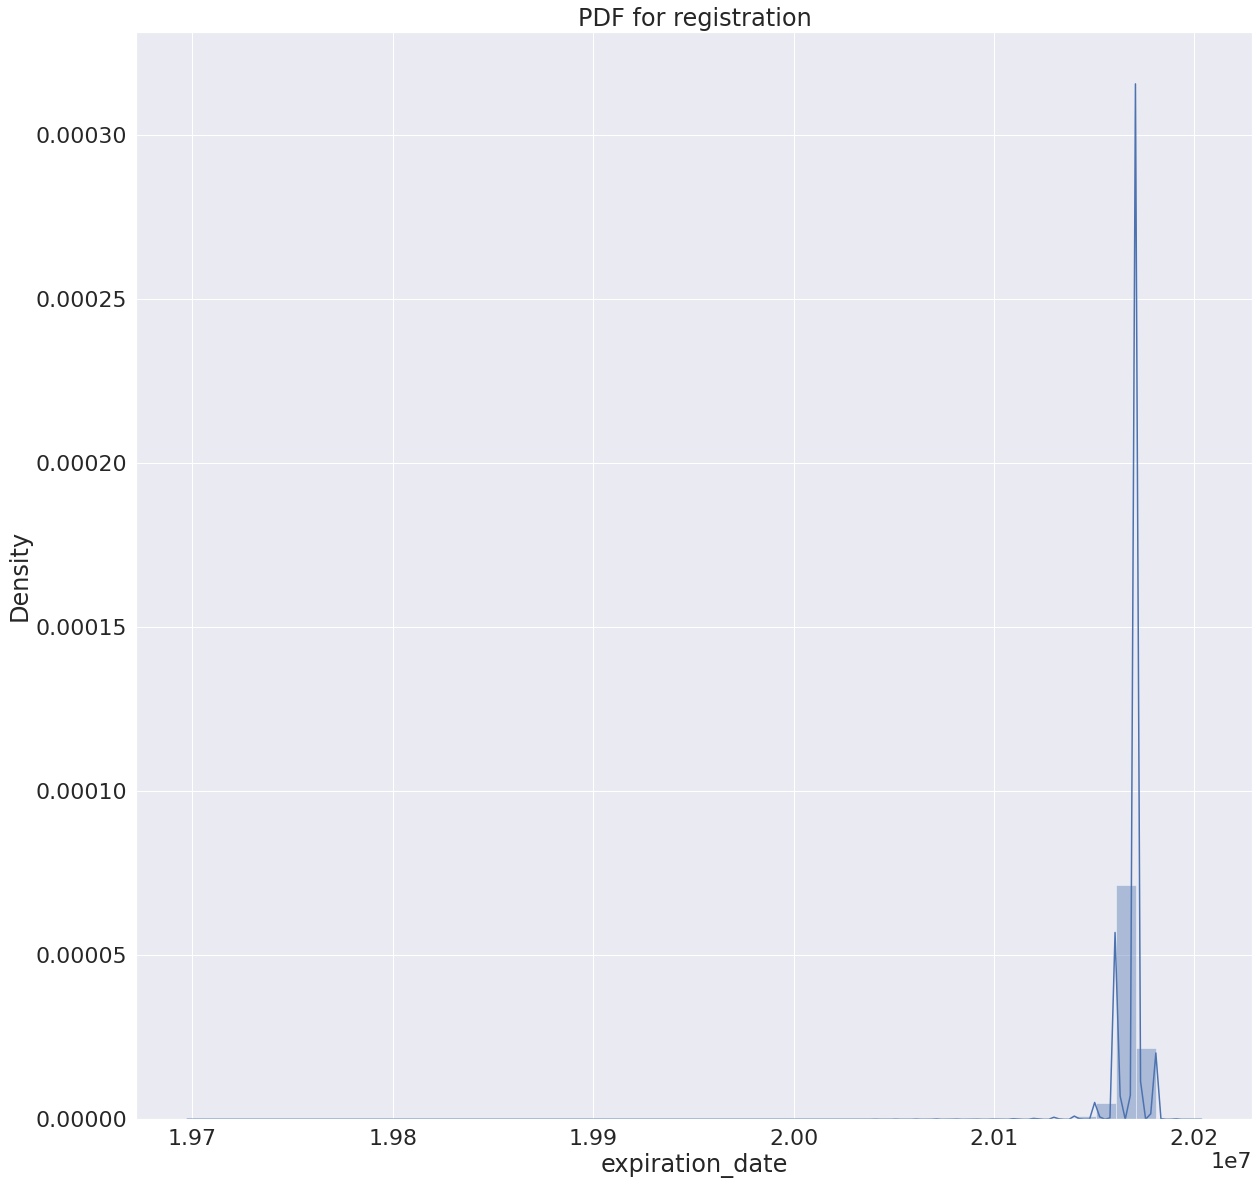

In [24]:
plt.figure(figsize = (20, 20)) 
sns.distplot(members['expiration_date'])
sns.set(font_scale=2)
plt.title('PDF for registration')

In [25]:
members.bd.unique()

array([   0,   43,   28,   33,   20,   30,   29,   26,   25,   21,   22,
         16,   23,   37,   18,   19,   51,   24,   17,   45,   36,   57,
         27,   34,   32,   15,   48,   50,   54,   47,   35,   46,   31,
         14,   41,   59,    2,   40,   38,   55,   39,   73,   49,   44,
        103,   52,   70,   42,   65,   56,  101,   58,   53,   64,   63,
         76,   66,   97,    3,   72,   67,   62,   61,  105,   60,   13,
         90,   12,   68,  131,   74,   89,  931,  -38,  144,   85,  112,
         96,   11,  102,   83, 1051,   87,    7,   95,  -43,  111,   93,
          5,   78, 1030,  106,  107,   82,   10])

In [26]:
def plot_pdf_cdf(x, flag):
  '''Function to plot pdf and cdf'''
  plt.figure(figsize = (15, 10)) 
  kwargs = {'cumulative': True}
  if flag:
    sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)
    plt.title('CDF for age')
  else:
    sns.distplot(x)
    plt.title('PDF for age')
  sns.set(font_scale=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


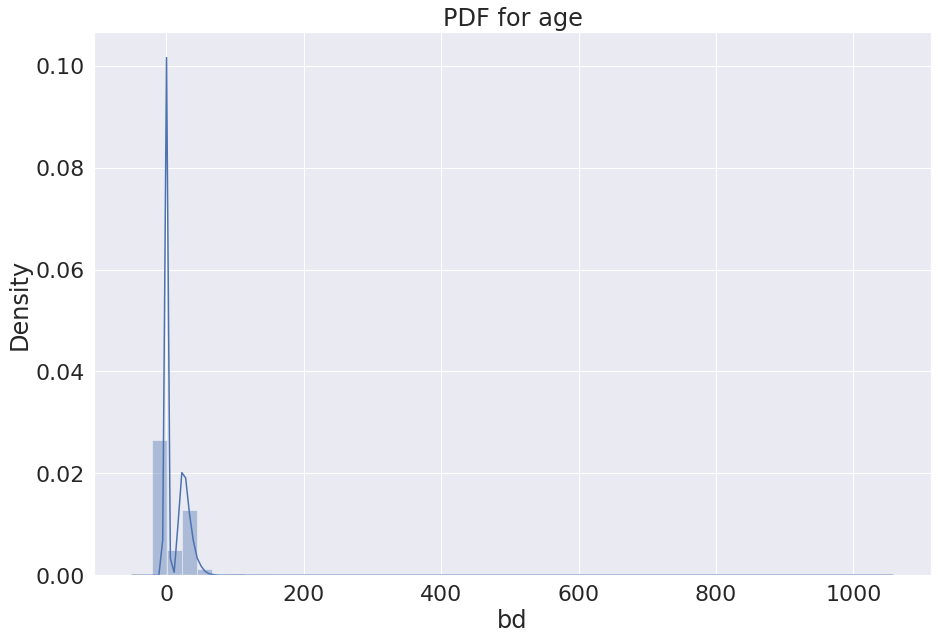

In [27]:
plot_pdf_cdf(members['bd'], False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


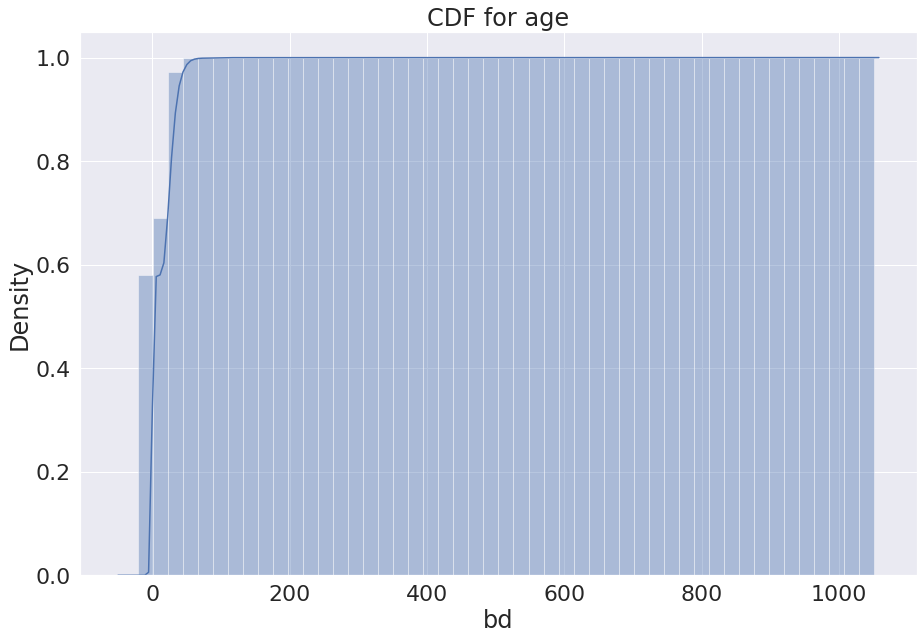

In [28]:
plot_pdf_cdf(members['bd'], True)

In [29]:
np.percentile(members['bd'].values, 98)

47.0

In [30]:
song_extra_info

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
27240,E9s10C4WWBfcyY9HpWPwyOL2ZpfVOqDtfohOtBh00PQ=,Run Away,TCAAS1055631
27241,jKRt2w/Zkrmd+0w6qCmnMPbwlRYDAd+TOkhC14WUjbA=,沒有泥土那有花,NaN
27242,ehGmQ+DRzZgqoE3dm+yNyXxntFvu10MnD/O3pJaE+ck=,Sleep Talking,TWA531300614
27243,i3pPrO9kgELunLzg0u7lzzWn6RfD/I7h5jb0V+ZVNXo=,Winter Wonderland,USSM10110540


In [31]:
songs_all_info = songs.merge(song_extra_info, on='song_id')

In [32]:
def isrc_to_year(isrc):
    if type(isrc) == str:
        if int(isrc[5:7]) > 17:
            return 1900 + int(isrc[5:7])
        else:
            return 2000 + int(isrc[5:7])
    else:
        return np.nan

songs_all_info['song_year'] = songs_all_info['isrc'].apply(isrc_to_year)

In [33]:
songs_all_info['language'].unique()

array([31., 17.,  3., 10., 52., -1., 24., 45., 59., 38.])

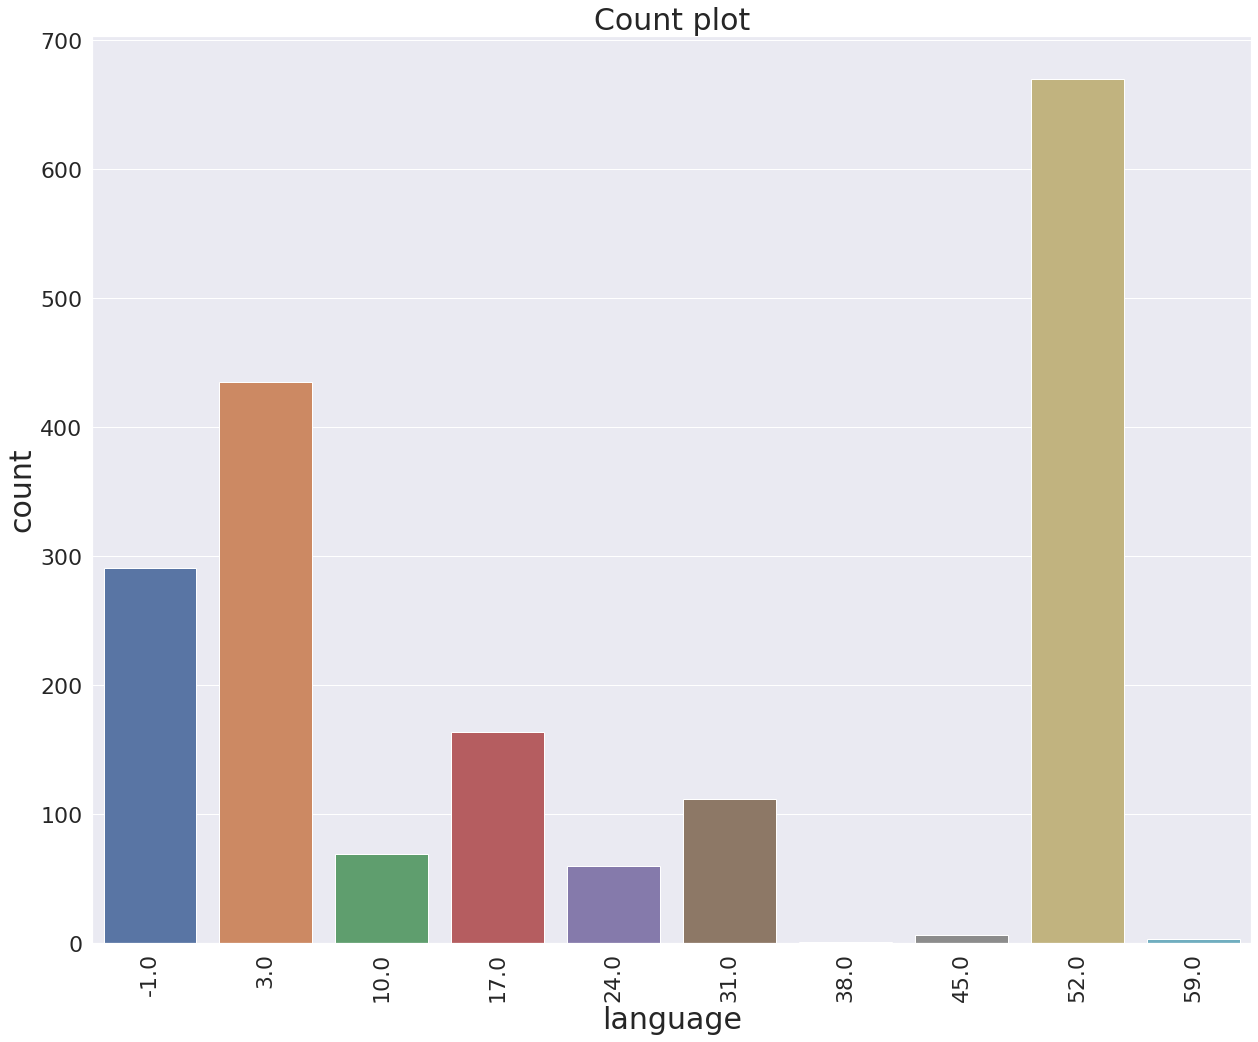

In [34]:
count_plot_function(songs_all_info, 'language')

In [35]:
def check_missing_values(df):
  '''Function to check missing values in df'''
  for col in df.columns:
    nan_count = df[col].isnull().sum()
    total = df.shape[0]
    percentage = nan_count/total * 100
    print(col, 'has {:.2f}% missing values'.format(percentage))

In [36]:
print('Missing values analysis for train data')
check_missing_values(train)

Missing values analysis for train data
msno has 0.00% missing values
song_id has 0.00% missing values
source_system_tab has 0.28% missing values
source_screen_name has 4.55% missing values
source_type has 0.24% missing values
target has 0.00% missing values


In [37]:
print('Missing values analysis for members data')
check_missing_values(members)

Missing values analysis for members data
msno has 0.00% missing values
city has 0.00% missing values
bd has 0.00% missing values
gender has 57.85% missing values
registered_via has 0.00% missing values
registration_init_time has 0.00% missing values
expiration_date has 0.00% missing values


In [38]:
print('Missing values analysis for songs data')
check_missing_values(songs)

Missing values analysis for songs data
song_id has 0.00% missing values
song_length has 0.00% missing values
genre_ids has 1.72% missing values
artist_name has 0.00% missing values
composer has 41.75% missing values
lyricist has 71.53% missing values
language has 0.00% missing values


In [39]:
print('Missing values analysis for songs_all_info data')
check_missing_values(songs_all_info)

Missing values analysis for songs_all_info data
song_id has 0.00% missing values
song_length has 0.00% missing values
genre_ids has 1.66% missing values
artist_name has 0.00% missing values
composer has 39.98% missing values
lyricist has 68.53% missing values
language has 0.00% missing values
name has 0.00% missing values
isrc has 15.02% missing values
song_year has 15.02% missing values


In [40]:
train_members = pd.merge(train, members, on='msno', how='left')
train_merged = pd.merge(train_members, songs_all_info, on='song_id', how='left')

In [41]:
test_members = pd.merge(test, members, on='msno', how='left')
test_merged = pd.merge(test_members, songs_all_info, on='song_id', how='left')

In [42]:
del train_members
del test_members

In [43]:
check_missing_values(train_merged)

msno has 0.00% missing values
song_id has 0.00% missing values
source_system_tab has 0.28% missing values
source_screen_name has 4.55% missing values
source_type has 0.24% missing values
target has 0.00% missing values
city has 0.00% missing values
bd has 0.00% missing values
gender has 39.76% missing values
registered_via has 0.00% missing values
registration_init_time has 0.00% missing values
expiration_date has 0.00% missing values
song_length has 99.20% missing values
genre_ids has 99.21% missing values
artist_name has 99.20% missing values
composer has 99.34% missing values
lyricist has 99.45% missing values
language has 99.20% missing values
name has 99.20% missing values
isrc has 99.33% missing values
song_year has 99.33% missing values


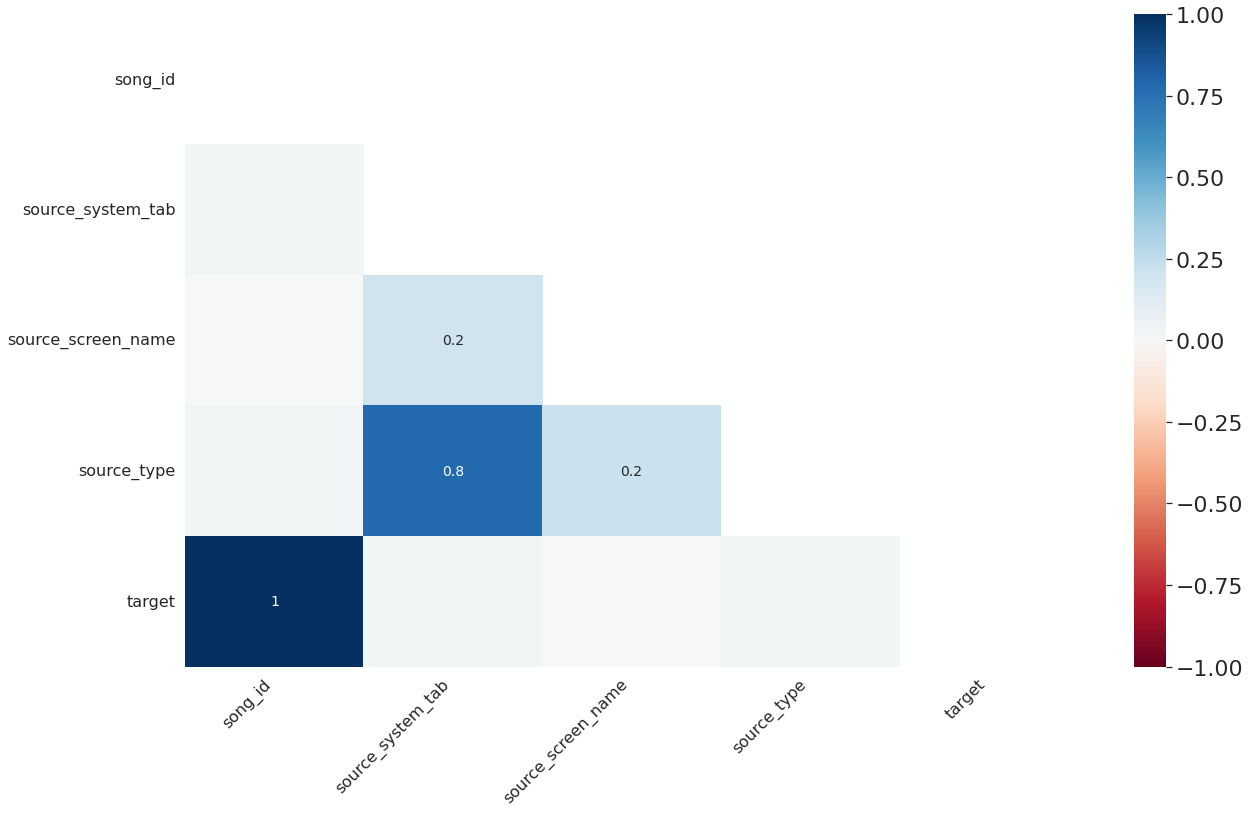

In [44]:
msno.heatmap(train)

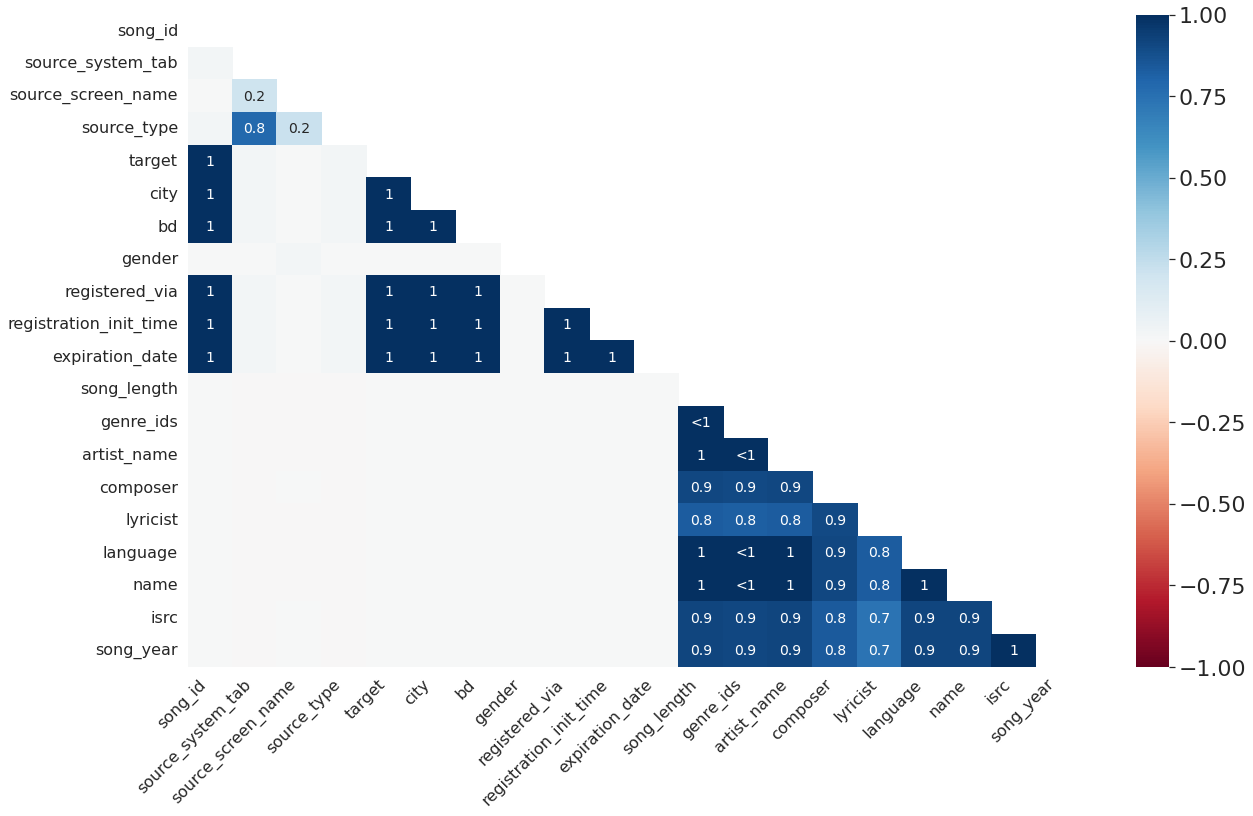

In [45]:
msno.heatmap(train_merged)


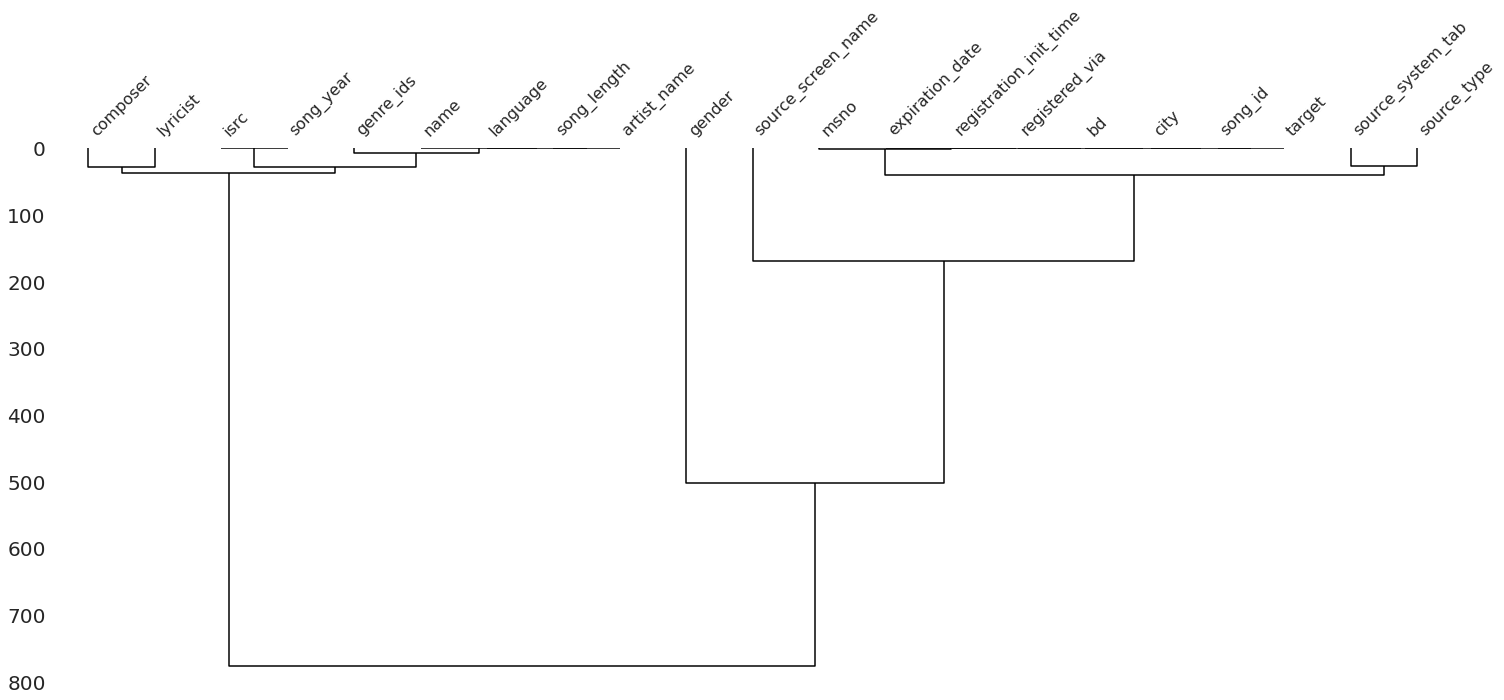

In [46]:
msno.dendrogram(train_merged)

In [47]:
del train, test, members, songs, song_extra_info

In [54]:
import time
import numpy as np
import pandas as pd
import lightgbm as lgb
import gc

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Feature engineering for genre

Some genre_ids have more than one values which are seperated by '|'.

We can extract features from genre_ids like total_count of genres.

We can also seperate genre_ids in-to individual columns. To achieve this we will consider more than 2 genre_ids_count.

I used the F.E idea from teh below link :

https://github.com/lystdo/Codes-for-WSDM-CUP-Music-Rec-1st-place-solution/blob/master/input/training/script/id_process.py

In [65]:
def generate_genre_ids(data):
  '''Function to sepearate each genre_id and count total number of genre_ids'''
  genre_ids_matrix = np.zeros((data.shape[0], 4))

  for i in range(data.shape[0]):
    ids = str(data['genre_ids'].values[i]).split('|')
    if len(ids) > 2:
        genre_ids_matrix[i, 0] = (ids[0])
        genre_ids_matrix[i, 1] = (ids[1])
        genre_ids_matrix[i, 2] = (ids[2])
    elif len(ids) > 1:
        genre_ids_matrix[i, 0] = (ids[0])
        genre_ids_matrix[i, 1] = (ids[1])
    elif len(ids) == 1:
        genre_ids_matrix[i, 0] = (ids[0])
    genre_ids_matrix[i, 3] = len(ids)

  data['first_genre_id'] = genre_ids_matrix[:, 0] # keeps first genre_id
  data['second_genre_id'] = genre_ids_matrix[:, 1] # keeps second genre_id
  data['third_genre_id'] = genre_ids_matrix[:, 2] # keeps third genre_id
  data['genre_ids_count'] = genre_ids_matrix[:, 3] # keeps count of genre_ids
  return data

# Feature engineering for artist

Tasks perfomed here are :

Some songs has 'feat' included in their artist names. We will add another column with boolean value based on 'feat' presents or not.

If more than one artists are present in the song then their names are seperated by & and ,

We will add extra features like is_featured, artist_count, first_artist_name.

In [68]:
def calculate_is_featured(data):
  '''Function to check 'feat' in artist field.'''
  data['is_featured'] = data['artist_name'].apply(lambda x: 1 if ' feat' in str(x) else 0).astype(np.int8)
  return data

In [70]:
def calculate_artist_features(data):
  '''Function to execute above both functions'''
  # get artist count 
  data['artist_count'] = data['artist_name'].apply(artist_count).astype(np.int8)
  # get first artist name
  data['first_artist_name'] = data['artist_name'].apply(get_first_artist)
  return data

# Feature engineering for songs extra

songs_extra file has feature like 'isrc' which is the International Standard Recording Code. Each song has its isrc which is unique which contains information like countr_code, registraion_code, year of reference and designation code.

https://isrc.ifpi.org/en/isrc-standard/code-syntax

We can extract features like country_code, registration_code and song_year from 'isrc' feature.

In [73]:
def calcualte_songs_features(data):
  '''Function to extract features from isrc.'''
  isrc = data['isrc']
  data['country_code'] = isrc.str.slice(0, 2)
  data['registration_code'] = isrc.str.slice(2, 5)
  data['song_year'] = isrc.str.slice(5, 7).astype(float)
  data['song_year'] = data['song_year'].apply(lambda x: 2000+x if x < 18 else 1900+x)
  data['isrc_missing'] = (data['country_code'] == 0) * 1.0
  return data

# Group by features

Some users have preferences over their favourite songs, artists or language.

**Like indian people over 40 ages are fond of hindi soothing or bollywood classics rather than english pop or rock music.**

**Using group by we can extract some features based on user's choices like song_count** (for each song how many times he/she listens), **artist_count** (for each artist how many number of users or songs are present in our dataset.)

We will extract theese types of group by features according to train, val and test data seperately to avoid data leakage issues.

In [75]:
def calculate_groupby_features(data):
  '''Function to calculate group by features on dataframe '''
  # song count for each user
  member_song_count = data.groupby('msno').count()['song_id'].to_dict()
  data['member_song_count'] = data['msno'].apply(lambda x: member_song_count[x])

  # song count for each artist
  artist_song_count = data.groupby('first_artist_name').count()['song_id'].to_dict()
  data['artist_song_count'] = data['first_artist_name'].apply(lambda x: artist_song_count[x])

  # song count for each genre_id
  first_genre_id_song_count = data.groupby('first_genre_id').count()['song_id'].to_dict()
  data['genre_song_count'] = data['first_genre_id'].apply(lambda x: first_genre_id_song_count[x])

  # song count for each lanugage
  lang_song_count = data.groupby('language').count()['song_id'].to_dict()
  data['lang_song_count'] = data['language'].apply(lambda x: lang_song_count[x])

  # user count for each song
  song_member_count = data.groupby('song_id').count()['msno'].to_dict()
  data['song_member_count'] = data['song_id'].apply(lambda x: song_member_count[x])

  # We can add group by  wrt 'age'
  age_song_count = data.groupby('bd').count()['song_id'].to_dict()
  data['age_song_count'] = data['bd'].apply(lambda x: age_song_count[x])
 
  return data
